In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [38]:
data = pd.read_csv('Titanic-Dataset.csv')
df = pd.DataFrame(data)

Null values

In [39]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Handling Null values

In [40]:
df_imputed = df.copy()

# 1. Impute missing values in 'Age' using the median
df_imputed["Age"] = df_imputed["Age"].fillna(df_imputed["Age"].median())
df_imputed["Age"] = df_imputed["Age"].round(0).astype("Int64")

# 2. Impute missing values in 'Embarked' using the mode (most frequent value)
df_imputed["Embarked"] = df_imputed["Embarked"].fillna(df_imputed["Embarked"].mode()[0])

# 3. Impute missing values in 'Cabin' using a placeholder value like 'Unknown'
df_imputed["Cabin"] = df_imputed["Cabin"].fillna("Unknown")

In [41]:
# Check if there are any missing values left
print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [42]:
cols = ['Survived', 'Age', 'SibSp', 'Sex', 'Embarked', 'Fare', "Parch"]
df_selected = df_imputed[cols]

In [43]:
summary = df_selected.describe(include='all')
print("Summary Statistics:\n", summary)

Summary Statistics:
           Survived        Age       SibSp   Sex Embarked        Fare  \
count   891.000000      891.0  891.000000   891      891  891.000000   
unique         NaN       <NA>         NaN     2        3         NaN   
top            NaN       <NA>         NaN  male        S         NaN   
freq           NaN       <NA>         NaN   577      646         NaN   
mean      0.383838  29.356902    0.523008   NaN      NaN   32.204208   
std       0.486592  13.017814    1.102743   NaN      NaN   49.693429   
min       0.000000        0.0    0.000000   NaN      NaN    0.000000   
25%       0.000000       22.0    0.000000   NaN      NaN    7.910400   
50%       0.000000       28.0    0.000000   NaN      NaN   14.454200   
75%       1.000000       35.0    1.000000   NaN      NaN   31.000000   
max       1.000000       80.0    8.000000   NaN      NaN  512.329200   

             Parch  
count   891.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     

In [44]:
print("\nMedian Values:\n", df_selected.median(numeric_only=True))
print("\nMode Values:\n", df_selected.mode().iloc[0])


Median Values:
 Survived        0.0
Age            28.0
SibSp           0.0
Fare        14.4542
Parch           0.0
dtype: Float64

Mode Values:
 Survived       0
Age           28
SibSp          0
Sex         male
Embarked       S
Fare        8.05
Parch          0
Name: 0, dtype: object


In [45]:
num_cols = ["Age", "Fare", "SibSp", "Parch"]
df_nums = df_imputed[num_cols]

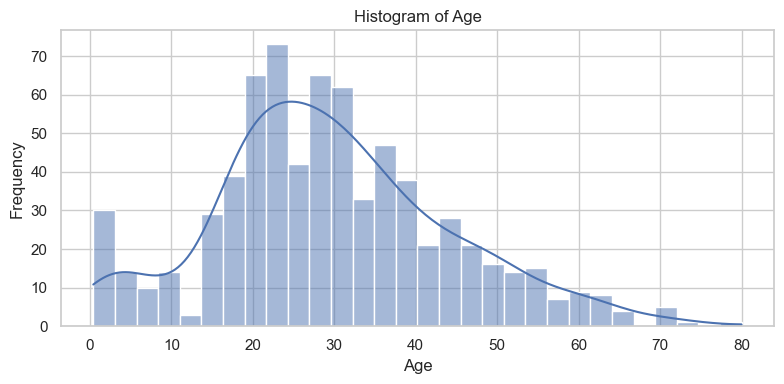

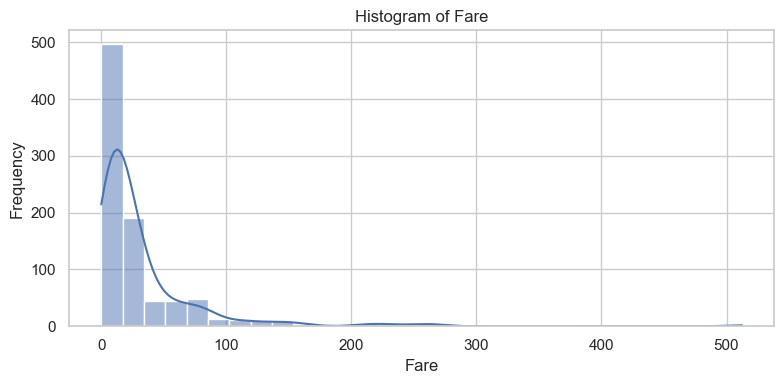

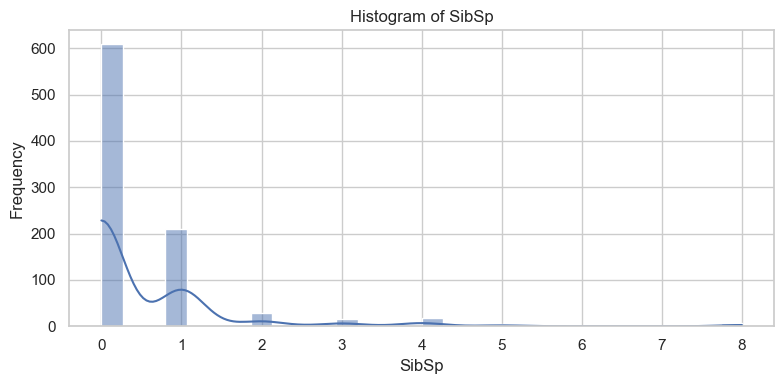

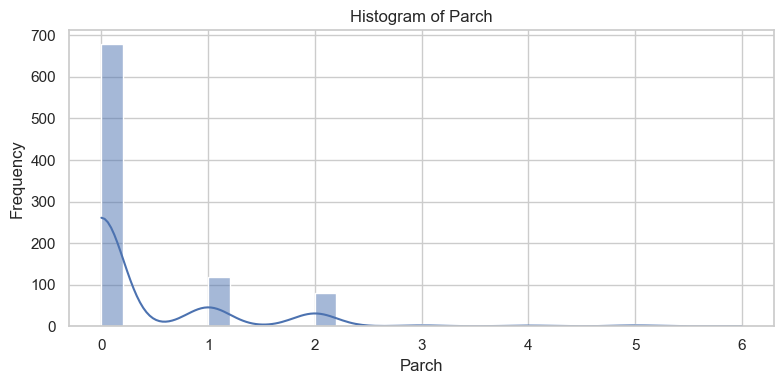

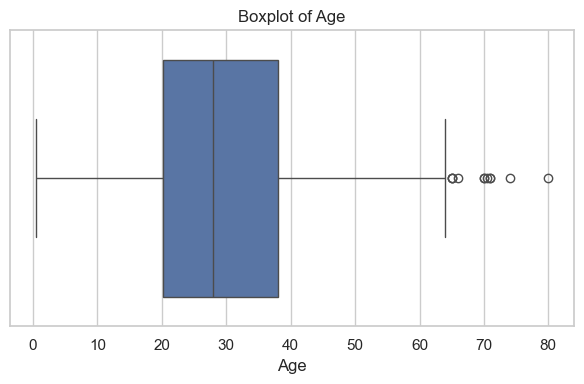

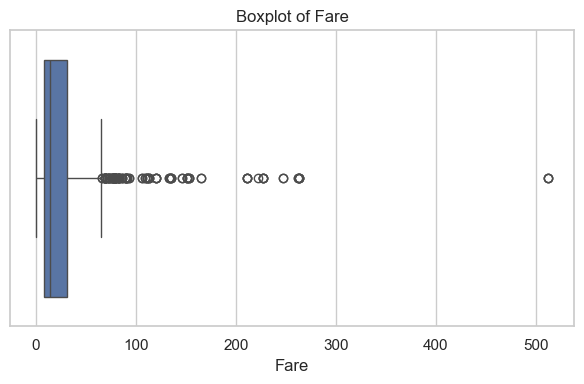

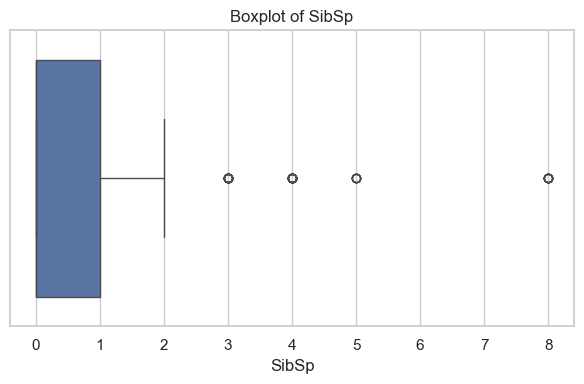

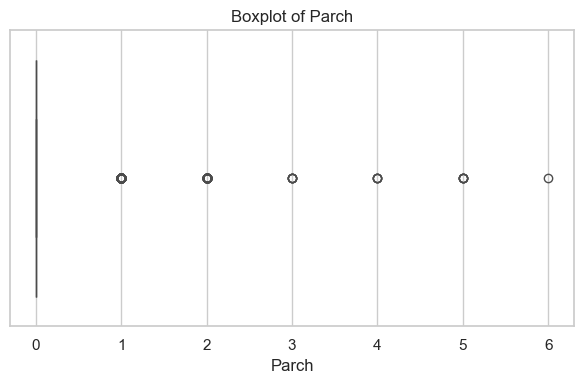

In [46]:
sns.set_theme(style="whitegrid")

# Create histograms
for feature in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Create boxplots
for feature in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

In [47]:
df_encoded = df_imputed.copy()
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
# Display the result
df_encoded[['Sex']].head(15)

,Sex
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


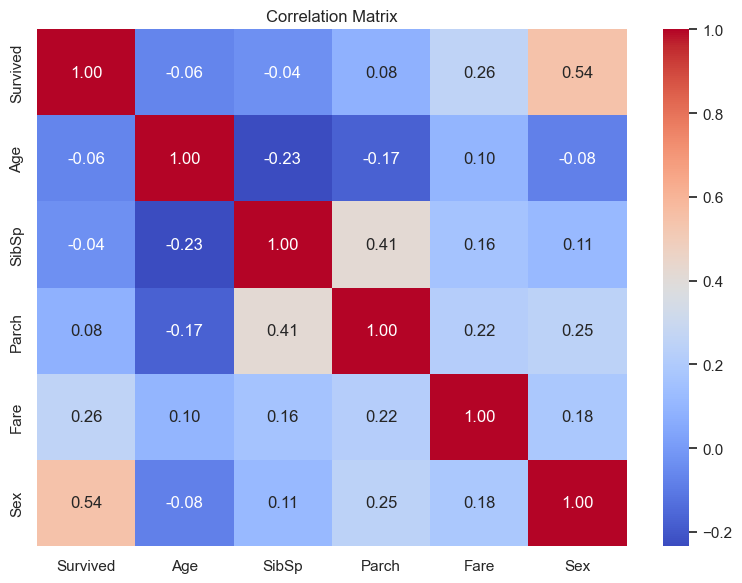

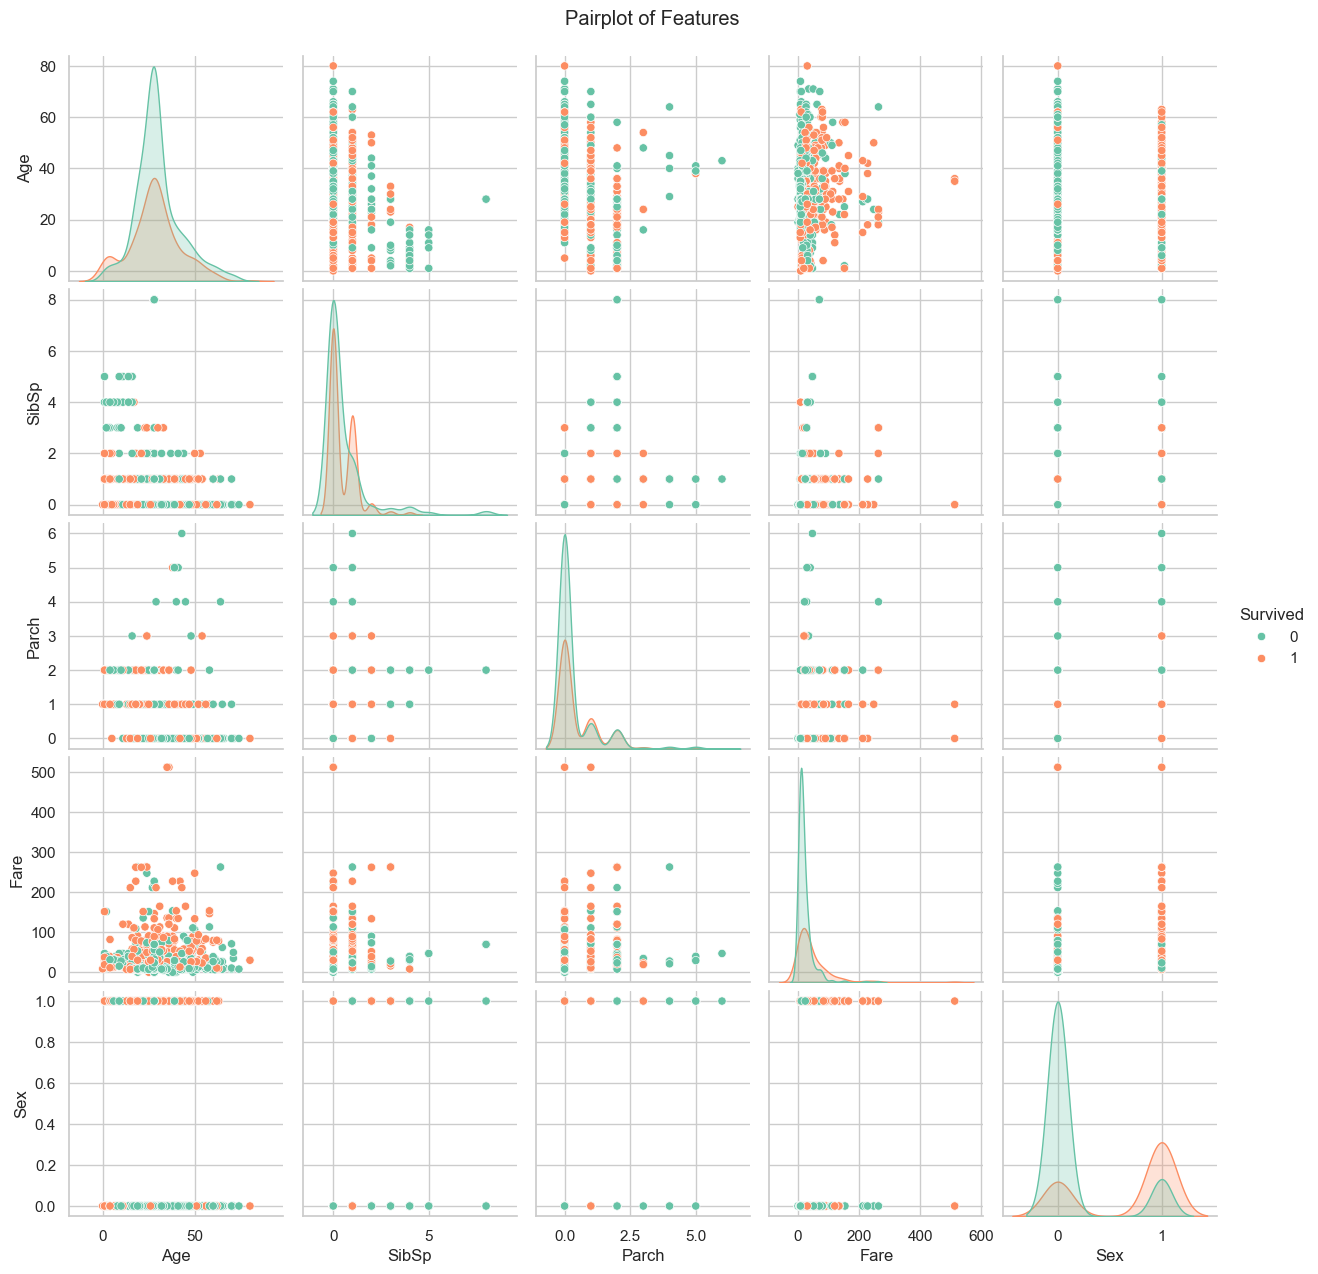

In [48]:
features = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

# ----- Correlation Matrix -----
plt.figure(figsize=(8, 6))
corr_matrix = df_encoded[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# ----- Pairplot -----
sns.pairplot(df_encoded[features], hue='Survived', palette='Set2')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [49]:
print("\n--- Survival Rate by Sex ---")
print(df.groupby('Sex')['Survived'].mean())


--- Survival Rate by Sex ---
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [50]:
# Survival rate by Pclass and Sex
print("\n--- Survival Rate by Pclass and Sex ---")
print(df.groupby(['Pclass', 'Sex'])['Survived'].mean())


--- Survival Rate by Pclass and Sex ---
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


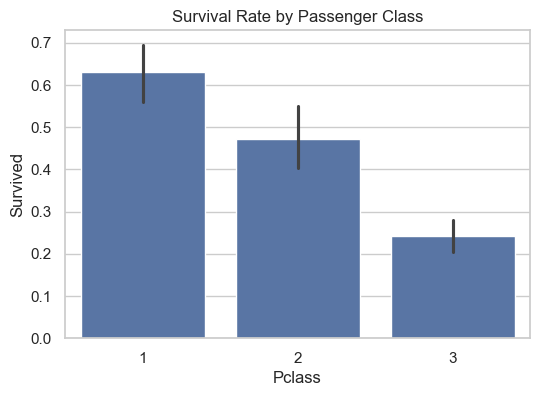

In [51]:
# Barplot: survival by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

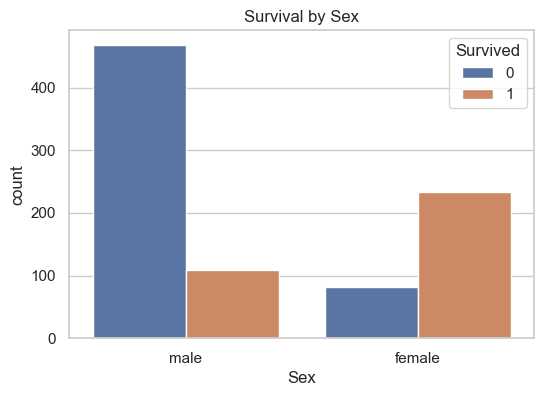

In [52]:
# Countplot: survival by sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

In [56]:
# Z-score method for Fare
df['Fare_z'] = zscore(df['Fare'])
outliers_fare = df[df['Fare_z'].abs() > 3]
print("\n--- Outliers in Fare (Z-score > 3) ---")
print(outliers_fare[['Name', 'Fare', 'Fare_z']])


--- Outliers in Fare (Z-score > 3) ---
                                                  Name      Fare    Fare_z
27                      Fortune, Mr. Charles Alexander  263.0000  4.647001
88                          Fortune, Miss. Mabel Helen  263.0000  4.647001
118                           Baxter, Mr. Quigg Edmond  247.5208  4.335332
258                                   Ward, Miss. Anna  512.3292  9.667167
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  247.5208  4.335332
311                         Ryerson, Miss. Emily Borie  262.3750  4.634417
341                     Fortune, Miss. Alice Elizabeth  263.0000  4.647001
377                          Widener, Mr. Harry Elkins  211.5000  3.610065
380                              Bidois, Miss. Rosalie  227.5250  3.932723
438                                  Fortune, Mr. Mark  263.0000  4.647001
527                                 Farthing, Mr. John  221.7792  3.817033
557                                Robbins, Mr. Victor  227.

In [54]:
# High Age outliers
high_age = df[df['Age'] > 70]
print("\n--- High Age Outliers (Age > 70) ---")
print(high_age[['Name', 'Age', 'Survived']])


--- High Age Outliers (Age > 70) ---
                                     Name   Age  Survived
96              Goldschmidt, Mr. George B  71.0         0
116                  Connors, Mr. Patrick  70.5         0
493               Artagaveytia, Mr. Ramon  71.0         0
630  Barkworth, Mr. Algernon Henry Wilson  80.0         1
851                   Svensson, Mr. Johan  74.0         0
